Reference - https://towardsdatascience.com/self-organizing-maps-1b7d2a84e065
Youtube Link - https://youtu.be/oMSdzLTzXRI

Importing nessesary packages

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

First we will load the D31 dataset.
Data is rounded to one decimal point because scatter plot won't work well with many decimal points
Finally data is normalized using MinMaxScaler() from sklearn

In [14]:
data = []
file = open("./data/D31.txt")
for line in file:
    data_point = line.split()
    for i in range(0, len(data_point)):
        data_point[i] = float(data_point[i])
    data_point_rounded = np.round(data_point, 1)
    data.append(data_point_rounded[:-1])

min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = min_max_scaler.fit_transform(data)

Let's visualize the dataset

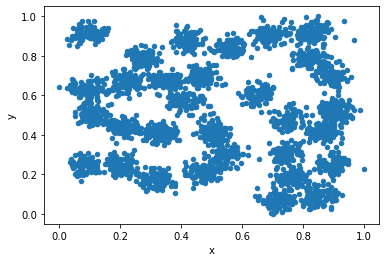

In [15]:
df = pd.DataFrame(data_normalized, columns=['x', 'y'])
ax1 = df.plot.scatter(x='x',
                     y='y')
plt.show()

This is a helper function to calculate euclidean distance between two vectors. This will help to find the node that is exited for a paticular example vector

In [16]:
# function to calculate euclidian distance
def calculate_euc_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)

Another helper function to calculate the manhatten distance between two vectors. This will help to find the neighbours for a paticular node

In [17]:
# function to calculate manhatten distance. used to get closest neighbours
def man_distance(node1_row, node1_col, node2_row, node2_col):
  return np.abs(node1_row-node2_row) + np.abs(node1_col-node2_col)

This function will be used to find the node that get exited for a paticular training example

In [18]:
def winning_node(data, data_index, som_map, map_rows, map_cols):
    node = (0,0)
    smallest_dist = 1000000
    for i in range(map_rows):
        for j in range(map_cols):
            euc_dist = calculate_euc_distance(som_map[i][j], data[data_index])
            if euc_dist < smallest_dist:
                smallest_dist = euc_dist
                node = (i, j)
    return node

This function will calculate the neighbourhood kernal value. This value will be used when updaing the exited and neighbour nodes
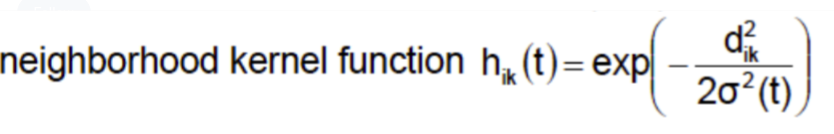

In [19]:
def neighbourhood_kernal(distance, nhood_size):
    return np.exp(-(pow(distance, 2) / 2 * pow(nhood_size, 2)))


This part will create a 6*6 2D array to represent the 2D lattice of nodes. Each node will be two dimentional and will be initialized with random values between 0 and 1

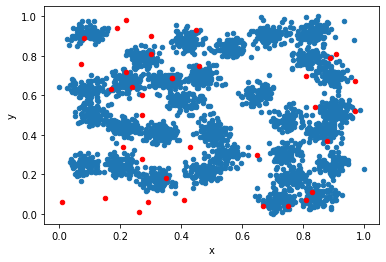

In [20]:
# define SOM row and col size
Rows = 6
Cols = 6
# create a 6x6 map of 2D nodes with a random value between 0-1
map = np.random.random_sample(size=(Rows,Cols,2))

initial_weights = []
for row in range(Rows):
    for col in range(Cols):
        weight = np.ndarray.round(map[row][col], decimals=2)
        initial_weights.append(weight)


map_df = pd.DataFrame(initial_weights, columns=['x', 'y'])
first_plot = df.plot.scatter(x='x', y='y')
map_df.plot.scatter(x='x', y='y', ax=first_plot, c='red')
# som_df.plot.line(x=0, y=1, ax=ax2, style='b')
plt.show()

This section will train the network. The algorithm consists of the following steps


    Set number of iterations
    For each iteration
        calculate neighbourhood size (will decrease with time)
        calculate learning rate (will decrease with time)
        choose a random training example
        find the node that gets exited for that training example
        Update the winning node and it's neighbours

    
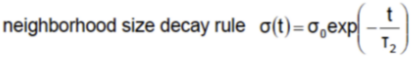
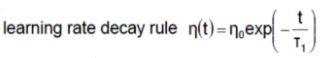

Exited node and neighbour nodes will be updated using the following formula
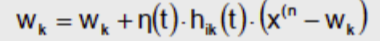

In [21]:
epochs = 5000
max_neighbourhood_size = 12
max_learning_rate = 0.5

for e in range(epochs):
    # calculate neighbourhood size. this will decrease with number of iterations
    neighbourhood_size = max_neighbourhood_size * np.exp(-e / epochs)
    # calculate learning rate. also decreases with number of iterations
    learning_rate = max_learning_rate * np.exp( -e / epochs)

    # choose random index from input data list
    index = np.random.randint(len(data_normalized))
    # get winning node
    winning_node_row, winning_node_col = winning_node(data_normalized, index, map, Rows, Cols)
    # update w of the winning node and neighbours
    for row in range(Rows):
        for col in range(Cols):
            distance_between_nodes = man_distance(winning_node_row, winning_node_col, row, col)
            if distance_between_nodes < neighbourhood_size:
                neighbourhood_kernal_val = neighbourhood_kernal(distance_between_nodes, neighbourhood_size)
                # updating weights of nodes
                map[row][col] = map[row][col] + learning_rate * neighbourhood_kernal_val * (data_normalized[index] - map[row][col])


print("SOM training completed")
print(map)


SOM training completed
[[[0.81219183 0.061693  ]
  [0.06455558 0.90061657]
  [0.75448984 0.47898023]
  [0.26282985 0.00859226]
  [0.33366649 0.1669493 ]
  [0.21513789 0.98258524]]

 [[0.53821188 0.30254257]
  [0.74651639 0.29981102]
  [0.89842141 0.23504355]
  [0.57755176 0.85047927]
  [0.07314742 0.24724387]
  [0.3428799  0.65858941]]

 [[0.84304444 0.90672028]
  [0.27256882 0.16100559]
  [0.22012982 0.69194814]
  [0.6487893  0.60879074]
  [0.14842025 0.0817487 ]
  [0.69410106 0.91332791]]

 [[0.11723895 0.5012785 ]
  [0.48532766 0.42503272]
  [0.76150096 0.17669786]
  [0.20458883 0.25524768]
  [0.88047469 0.1215525 ]
  [0.31309004 0.41096905]]

 [[0.0899045  0.62779573]
  [0.46852278 0.20946672]
  [0.71578482 0.05521152]
  [0.4572433  0.70142499]
  [0.853061   0.73527923]
  [0.22273144 0.4454202 ]]

 [[0.88746059 0.46667335]
  [0.42507298 0.87359107]
  [0.41794364 0.57135946]
  [0.10998697 0.91520631]
  [0.26563207 0.79115465]
  [0.18280792 0.62944507]]]


Finally the nodes are plotted on the dataset to visualize how each node represent different clusters in the dataset

       x     y
0   0.81  0.06
1   0.06  0.90
2   0.75  0.48
3   0.26  0.01
4   0.33  0.17
5   0.22  0.98
6   0.54  0.30
7   0.75  0.30
8   0.90  0.24
9   0.58  0.85
10  0.07  0.25
11  0.34  0.66
12  0.84  0.91
13  0.27  0.16
14  0.22  0.69
15  0.65  0.61
16  0.15  0.08
17  0.69  0.91
18  0.12  0.50
19  0.49  0.43
20  0.76  0.18
21  0.20  0.26
22  0.88  0.12
23  0.31  0.41
24  0.09  0.63
25  0.47  0.21
26  0.72  0.06
27  0.46  0.70
28  0.85  0.74
29  0.22  0.45
30  0.89  0.47
31  0.43  0.87
32  0.42  0.57
33  0.11  0.92
34  0.27  0.79
35  0.18  0.63


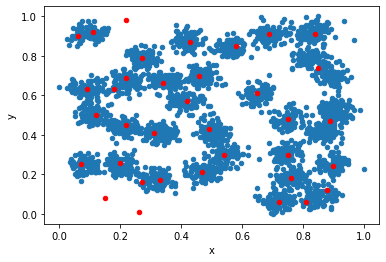

In [22]:
weights = []
for row in range(Rows):
    for col in range(Cols):
        weight = np.ndarray.round(map[row][col], decimals=2)
        weights.append(weight)


som_df = pd.DataFrame(weights, columns=['x', 'y'])
print(som_df)

first_plot = df.plot.scatter(x='x', y='y')
som_df.plot.scatter(x='x', y='y', ax=first_plot, c='red')
plt.show()

